In [1]:
import numpy as np
import pandas as pd
from random import random
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats.mstats import gmean

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
n = X.shape[0]  #num of observations
d = X.shape[1]  #dimentionality of data

k = 3  #num of clusters
r = 5  #num of restarts
p = 0  #percision of the optimization

In [3]:
def best_cluster(mu_mat, sample):
    '''input: cluster centeroids and one sample
    output: number fo the best cluster for the input sample'''
    distances = LA.norm(mu_mat - sample, axis=1)**2
    cluster_num = np.argmin(distances, axis=0)
    return cluster_num

In [4]:
def partition(data, mu_mat):
    '''input: data samples and clusters mu (matrix)
    output: a vector containing cluster number for each sample'''
    cluster_num_vec = [None] * data.shape[0]
    for i in range(0,data.shape[0]):
        cluster_num_vec[i] = best_cluster(mu_mat, data[i,:])
    cluster_num_vec = np.array(cluster_num_vec)
    return cluster_num_vec

In [5]:
def cost(data, mu_mat, cluster_num_vec):
    '''input: samples, cluster centers, and a vector containing the respective cluster for each sample
    output: the cost value of this partitioning'''
    cluster_num_vec = np.array(cluster_num_vec)
    cost_val = 0
    for i in range(mu_mat.shape[0]):
        cluster = data[cluster_num_vec==i, :]  #the i-th cluster
        for j in range(cluster.shape[0]):
            cost_val = cost_val + LA.norm(mu_mat[i,:] - cluster[j,:], axis=0)**2
#         if cluster:  #this means it is not empty
    cost_val = cost_val/data.shape[0]
    return cost_val

In [6]:
def update_centeroids(data, cluster_num_vec, num_of_clusters):
    '''input: data and a vector containing the respective cluster for each sample, and number of clusters
    output: updated mu matrix (the mean of clusters)'''
    new_mu_mat = [None] * num_of_clusters
    for i in range(num_of_clusters):
        new_mu_mat[i] = [None] * data.shape[1]
    new_mu_mat = np.array(new_mu_mat)
    for i in range(num_of_clusters):
        cluster = data[cluster_num_vec==i, :]  #the i-th cluster
        if cluster.shape:  #this means it is not empty
            new_mu_mat[i,:] = cluster.mean(0)
        else:
            pass
    return new_mu_mat

In [7]:
def Lloyd(X, n, d, k, r, p):
    final_cost = float("inf")
    for restart in range(1,r):
        #initialization
        random_indeces = np.random.randint(n, size=k)
        mu_mat = X[random_indeces,:]
        main_partition = partition(X, mu_mat)
        previous_cost = cost(X, mu_mat, main_partition);
        new_cost = 0
        flag = True
        while abs(previous_cost-new_cost) > p and flag:
            new_mu_mat = update_centeroids(X, main_partition, k)
            new_mu_mat = np.float64(new_mu_mat)
            new_partition = partition(X, new_mu_mat)
            new_cost = cost(X, mu_mat, new_partition)
            previous_cost = cost(X, mu_mat, main_partition)
            if abs(previous_cost-new_cost) > p:
                main_partition = new_partition
                mu_mat = new_mu_mat
        previous_cost = cost(X, mu_mat, main_partition);
        if final_cost > previous_cost:
            final_partition = main_partition
            final_mu = mu_mat
            final_cost = previous_cost
#     print("final_cost cost:", final_cost)
    return final_partition, final_mu, final_cost

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Amin\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


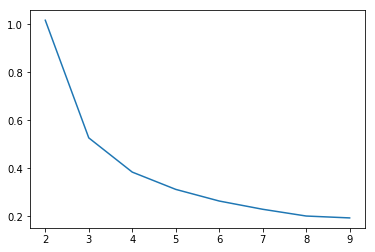

In [8]:
cluster_range = range (2,10)
the_cost = [None] * (len(cluster_range))
the_cost = np.array(the_cost)
for number_of_clusters in cluster_range:
    _, _, the_cost[number_of_clusters-2] = Lloyd(X=X, n=n, d=d, k=number_of_clusters, r=r, p=p)
plt.plot(cluster_range, the_cost)

In [9]:
partitions, mus, outcost = Lloyd(X=X, n=n, d=d, k=k, r=r, p=p)


ratio_cat1 = np.amax(np.bincount(partitions[y==0]))/len(partitions[y==0])
ratio_cat2 = np.amax(np.bincount(partitions[y==1]))/len(partitions[y==1])
ratio_cat3 = np.amax(np.bincount(partitions[y==2]))/len(partitions[y==2])
print(ratio_cat1, ratio_cat2, ratio_cat3)
gmean([ratio_cat1, ratio_cat2, ratio_cat3])

1.0 0.96 0.72


0.8841675596736928